In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# dataset: https://bigcitieshealthdata.org/

df = pd.read_csv('BigCitiesHealth.csv')
obesity_data = df[df['metric_item_label']=='Adult Obesity']
obesity_data.head()

C:\Users\pih\AppData\Local\Temp\ipykernel_1348\2384203210.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BigCitiesHealth.csv')


,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
48183,Adult Obesity,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 18+ who are obese,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Detroit,MI,"Detroit, MI",...,NaN,NaN,Midwest,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
48184,Adult Obesity,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 18+ who are obese,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Boston,MA,"Boston, MA",...,NaN,NaN,Northeast,Less poor cities (<20% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
48185,Adult Obesity,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 18+ who are obese,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Baltimore,MD,"Baltimore, MD",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
48186,Adult Obesity,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 18+ who are obese,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
48187,Adult Obesity,Chronic Health Conditions,Diabetes and Obesity,Percent of adults aged 18+ who are obese,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Baltimore,MD,"Baltimore, MD",...,NaN,NaN,South,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN


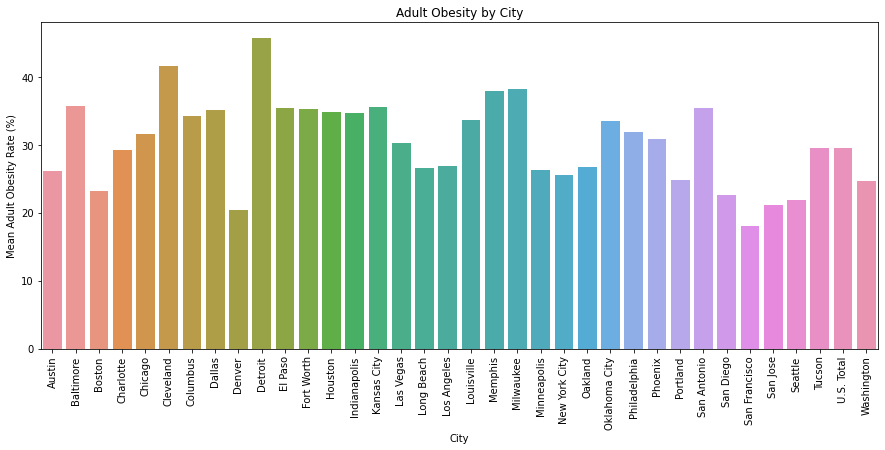

In [3]:
# Group the data by city and compute the mean value for 'Adult Obesity'
city_obesity = obesity_data.groupby('geo_label_city')['value'].mean().reset_index()

# Barplot of 'Adult Obesity' mean value for each city
plt.figure(figsize=(15, 6))
sns.barplot(x='geo_label_city', y='value', data=city_obesity)
plt.title('Adult Obesity by City')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Mean Adult Obesity Rate (%)')
plt.show()

In [4]:
# Extract the selected independent variables for each city
pop_density_data = df[df['metric_item_label'] == 'Population Density']
income_inequality_data = df[df['metric_item_label'] == 'Income Inequality']
poverty_data = df[df['metric_item_label'] == 'Poverty in All Ages']
physical_activity_data = df[df['metric_subcat_label'] == 'Physical Activity']

# Calculate the mean value for each independent variable by city
pop_density_by_city = pop_density_data.groupby('geo_label_city')['value'].mean().reset_index()
income_inequality_by_city = income_inequality_data.groupby('geo_label_city')['value'].mean().reset_index()
poverty_by_city = poverty_data.groupby('geo_label_city')['value'].mean().reset_index()
physical_activity_by_city = physical_activity_data.groupby('geo_label_city')['value'].mean().reset_index()

# Merge the data on 'geo_label_city'
merged_data = city_obesity.merge(pop_density_by_city, on='geo_label_city', suffixes=('', '_pop_density'))
merged_data = merged_data.merge(income_inequality_by_city, on='geo_label_city', suffixes=('', '_income_inequality'))
merged_data = merged_data.merge(poverty_by_city, on='geo_label_city', suffixes=('', '_poverty'))
merged_data = merged_data.merge(physical_activity_by_city, on='geo_label_city', suffixes=('', '_physical_activity'))

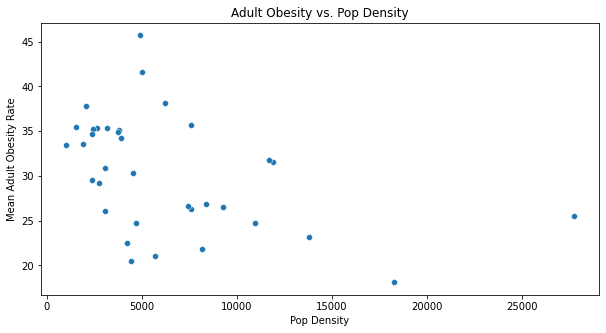

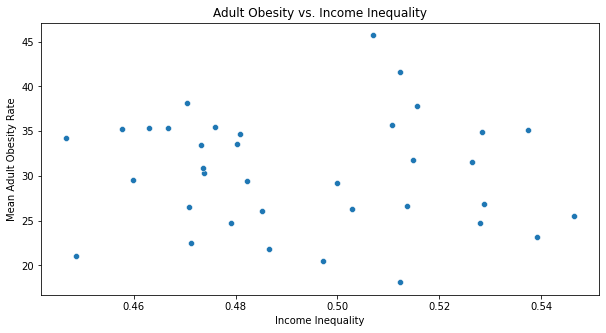

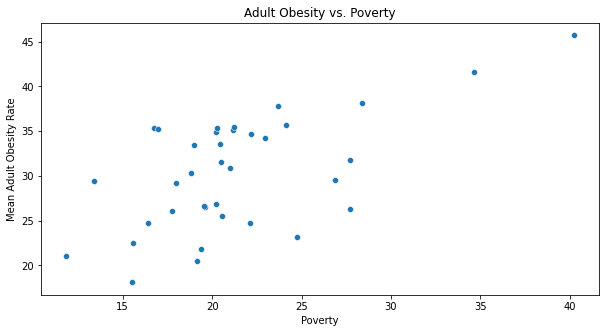

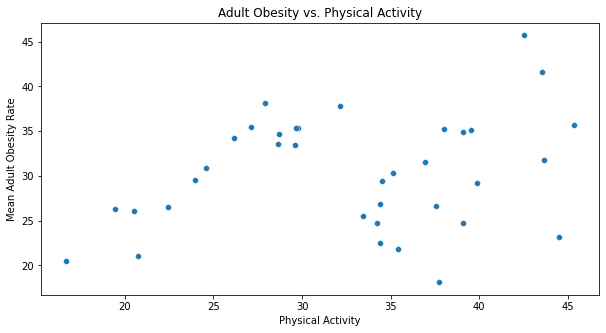

In [5]:
# Scatter plots for the selected independent variables
for suffix in ['_pop_density', '_income_inequality', '_poverty', '_physical_activity']:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=merged_data, x=f'value{suffix}', y='value')
    plt.title(f'Adult Obesity vs. {suffix[1:].replace("_", " ").title()}')
    plt.xlabel(suffix[1:].replace("_", " ").title())
    plt.ylabel('Mean Adult Obesity Rate')
    plt.show()